In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

#Reading the dataset
df = pd.read_excel('CleanedWHRData.xlsx')
df.head()

,Country name,year,Happiness Score,GDPperCapita,HealthyLifeExpectancyAtBirth,SocialSupport,FreedomToMakeLifeChoices,Generosity_,PerceptionsOfCorruption,PositiveAffect,NegativeAffect
0,Algeria,2014,6.354898,9.335159,65.139999,0.818189,0.519009,-0.144289,0.690871,0.625905,0.176866
1,Algeria,2016,5.340854,9.362022,65.500000,0.748588,0.519009,-0.144289,0.690871,0.660510,0.377112
2,Bahrain,2014,6.165134,10.783467,67.419998,0.880093,0.861467,0.062787,0.553173,0.721696,0.353544
3,Bahrain,2015,6.007375,10.785271,67.699997,0.852551,0.849521,0.112021,0.553173,0.715543,0.302972
4,Bahrain,2016,6.169673,10.780850,68.099998,0.862700,0.888691,0.088187,0.553173,0.787187,0.283466


In [2]:
#Checking Datatypes
df.dtypes

Country name                     object
year                              int64
Happiness Score                 float64
GDPperCapita                    float64
HealthyLifeExpectancyAtBirth    float64
SocialSupport                   float64
FreedomToMakeLifeChoices        float64
Generosity_                     float64
PerceptionsOfCorruption         float64
PositiveAffect                  float64
NegativeAffect                  float64
dtype: object

In [3]:
#Checking missing values in Dataset
df.isnull().sum()

Country name                    0
year                            0
Happiness Score                 0
GDPperCapita                    0
HealthyLifeExpectancyAtBirth    0
SocialSupport                   0
FreedomToMakeLifeChoices        0
Generosity_                     0
PerceptionsOfCorruption         0
PositiveAffect                  0
NegativeAffect                  0
dtype: int64

In [4]:
X = df[['GDPperCapita', 'HealthyLifeExpectancyAtBirth', 'SocialSupport', 
             'FreedomToMakeLifeChoices','Generosity_', 'PerceptionsOfCorruption', 'PositiveAffect', 'NegativeAffect']]
y = df['Happiness Score']

In [5]:
import statsmodels.api as sm
X = sm.add_constant(X)
ols_model = sm.OLS(y, X)
fitted_model = ols_model.fit()
fitted_model.params
fitted_model.summary()

C:\Users\deepa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     778.5
Date:                Fri, 25 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:52:39   Log-Likelihood:                -1577.5
No. Observations:                1949   AIC:                             3173.
Df Residuals:                    1940   BIC:                             3223.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.6174      0.178    -14.704      0.000      -2.967      -2.268
GDPperCapita                     0.3579      0.022     16.073      0.000       0.314       0.402
HealthyLifeExpectancyAtBirth     0.0295      0.003      9.420      0.000       0.023       0.036
SocialSupport                    1.9648      0.162     12.134      0.000       1.647       2.282
FreedomToMakeLifeChoices         0.3705      0.123      3.010      0.003       0.129       0.612
Generosity_                      0.4204      0.086      4.880      0.000       0.251       0.589
PerceptionsOfCorruption         -0.5755      0.081     -7.070      0.000      -0.735      -0.416
PositiveAffect                   1.9826      0.159     12.488      0.000       1.671       2.294
NegativeAffect                   0.0253      0.168      0.150      0.880      -0.305       0.356
==============================================================================
Omnibus:                       43.827   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.830
Skew:                          -0.298   Prob(JB):                     3.37e-12
Kurtosis:                       3.544   Cond. No.                     1.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

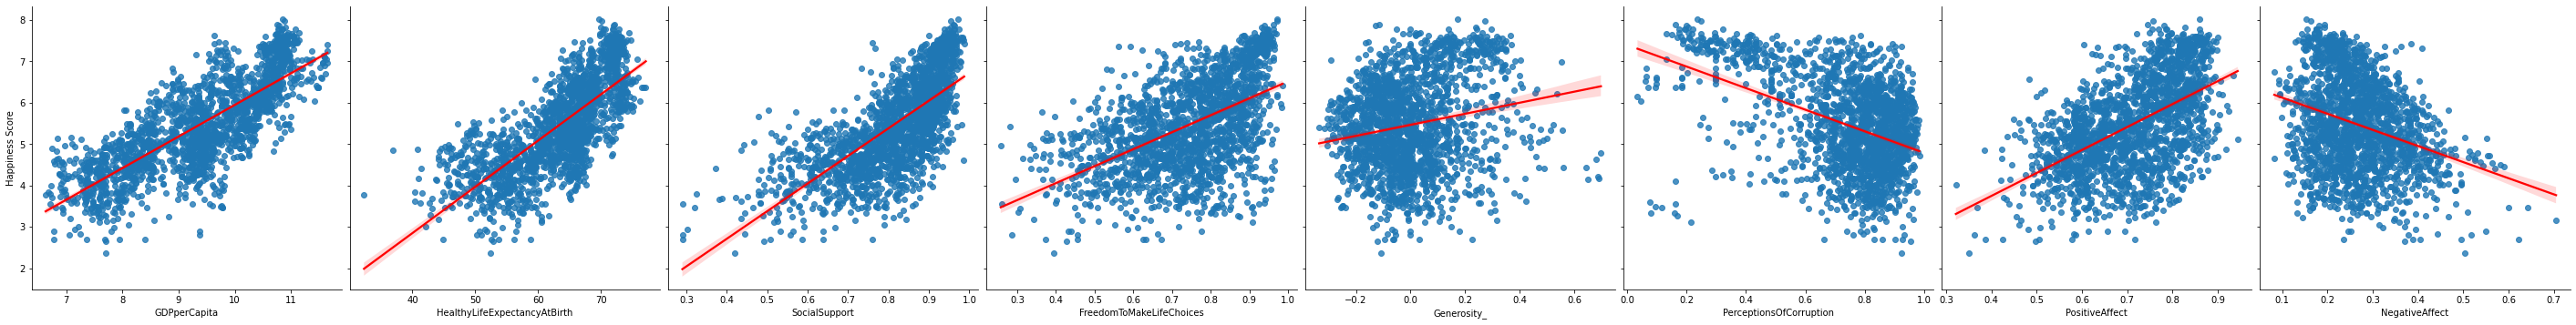

In [31]:
#List containing the 8 factors
l_factors = ['GDPperCapita', 'HealthyLifeExpectancyAtBirth', 'SocialSupport', 
             'FreedomToMakeLifeChoices','Generosity_', 'PerceptionsOfCorruption', 'PositiveAffect', 'NegativeAffect']

#Plotting scatter plots of all 8 factors against Life Ladder
sb.pairplot(df, kind = 'reg', height = 5, y_vars="Happiness Score", x_vars=l_factors, plot_kws={'line_kws':{'color':'red'}})

<AxesSubplot:>

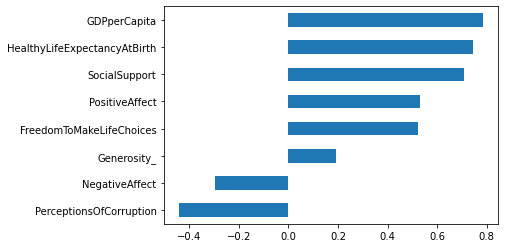

In [7]:
#Correlation of each factor with Life ladder

corr_matrix=df[["Happiness Score"]+l_factors].corr()

target_corr = corr_matrix["Happiness Score"].drop(['Happiness Score'])

target_corr.sort_values(ascending=True).plot(kind='barh')

<AxesSubplot:>

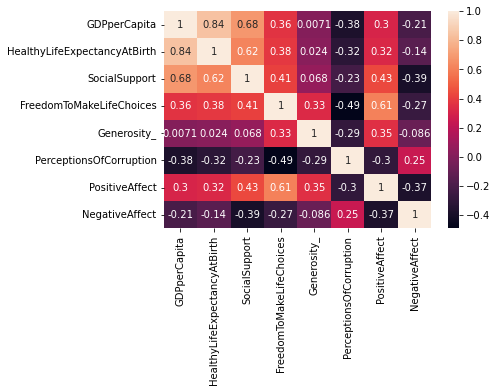

In [8]:
#Correlation among the 8 factors

corr_matrix=df[l_factors].corr()
sb.heatmap(corr_matrix, annot = True)

In [9]:
x = df.drop(columns=["Country name","year","Happiness Score"])
x

,GDPperCapita,HealthyLifeExpectancyAtBirth,SocialSupport,FreedomToMakeLifeChoices,Generosity_,PerceptionsOfCorruption,PositiveAffect,NegativeAffect
0,9.335159,65.139999,0.818189,0.519009,-0.144289,0.690871,0.625905,0.176866
1,9.362022,65.500000,0.748588,0.519009,-0.144289,0.690871,0.660510,0.377112
2,10.783467,67.419998,0.880093,0.861467,0.062787,0.553173,0.721696,0.353544
3,10.785271,67.699997,0.852551,0.849521,0.112021,0.553173,0.715543,0.302972
4,10.780850,68.099998,0.862700,0.888691,0.088187,0.553173,0.787187,0.283466
...,...,...,...,...,...,...,...,...
1944,9.480086,66.500000,0.886882,0.610855,-0.164148,0.827560,0.759221,0.373658
1945,9.480086,66.699997,0.887672,0.625526,-0.164148,0.839340,0.761240,0.350950
1946,9.480086,66.900002,0.805224,0.611815,-0.164148,0.811319,0.722391,0.396250
1947,8.102699,56.700001,0.789422,0.552726,-0.126301,0.792587,0.461114,0.314870


In [10]:
y = df["Happiness Score"]

In [11]:
#Split the Dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=3)

#Instanciate the model
model = LinearRegression()

#Fit the model
model.fit(x_train, y_train)

#read the model score
model.score(x_test, y_test)

0.7513193701606652

In [12]:
perm_score = permutation_importance(model, x_train, y_train, n_repeats=40)
perm_score

{'importances_mean': array([0.27710975, 0.05195991, 0.10515373, 0.00304022, 0.00477003,
        0.02823407, 0.07487455, 0.00030058]),
 'importances_std': array([0.0113295 , 0.00350397, 0.00679998, 0.00101602, 0.00144213,
        0.00333598, 0.00605895, 0.00032287]),
 'importances': array([[ 2.75853627e-01,  2.77287144e-01,  2.82108176e-01,
          2.83890818e-01,  2.90368648e-01,  2.91905116e-01,
          2.81195094e-01,  3.03136701e-01,  2.72317439e-01,
          2.78111134e-01,  2.78445761e-01,  2.86056422e-01,
          2.68652843e-01,  2.85308484e-01,  2.77352972e-01,
          2.67846284e-01,  2.73227039e-01,  2.74008650e-01,
          2.77054406e-01,  2.88026766e-01,  2.64830228e-01,
          2.71778374e-01,  2.73495803e-01,  2.72290661e-01,
          2.64779167e-01,  2.80712796e-01,  2.91253262e-01,
          2.53883773e-01,  2.87859652e-01,  2.57358969e-01,
          3.00762376e-01,  2.63877957e-01,  2.88324311e-01,
          2.70511361e-01,  2.69237063e-01,  2.70008855e-01

In [13]:
df_features =pd.DataFrame(np.vstack((x_train.columns, perm_score.importances_mean)).T, columns=['features','importance'])

In [14]:
df_features

,features,importance
0,GDPperCapita,0.27711
1,HealthyLifeExpectancyAtBirth,0.05196
2,SocialSupport,0.105154
3,FreedomToMakeLifeChoices,0.00304
4,Generosity_,0.00477
5,PerceptionsOfCorruption,0.028234
6,PositiveAffect,0.074875
7,NegativeAffect,0.000301


In [15]:
df_features.sort_values('importance', ascending = False).reset_index(drop=True)

,features,importance
0,GDPperCapita,0.27711
1,SocialSupport,0.105154
2,PositiveAffect,0.074875
3,HealthyLifeExpectancyAtBirth,0.05196
4,PerceptionsOfCorruption,0.028234
5,Generosity_,0.00477
6,FreedomToMakeLifeChoices,0.00304
7,NegativeAffect,0.000301


In [16]:
#Model 1 with Top 1 Feature

#Top 1 Feature
top_1feature = df_features['features'].iloc[0:1]

#Split the Dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x[top_1feature] ,y,test_size=0.3,random_state=3)

#Instanciate the model
model = LinearRegression()

#Fit the model
model.fit(x_train, y_train)

#read the model score
model.score(x_test, y_test)

0.6086722003586218

In [17]:
#Model 2 with Top 2 Feature

#Top 2 Feature
top_2feature = df_features['features'].iloc[0:2]
print(top_2feature)
#Split the Dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x[top_2feature] ,y,test_size=0.3,random_state=3)

#Instanciate the model
model = LinearRegression()

#Fit the model
model.fit(x_train, y_train)

#read the model score
model.score(x_test, y_test)

0                    GDPperCapita
1    HealthyLifeExpectancyAtBirth
Name: features, dtype: object


0.6444258270041014

In [18]:
#Model 3 with Top 3 Feature

#Top 3 Feature
top_3feature = df_features['features'].iloc[0:3]
print(top_3feature)
#Split the Dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x[top_3feature] ,y,test_size=0.3,random_state=3)

#Instanciate the model
model = LinearRegression()

#Fit the model
model.fit(x_train, y_train)

#read the model score
model.score(x_test, y_test)

0                    GDPperCapita
1    HealthyLifeExpectancyAtBirth
2                   SocialSupport
Name: features, dtype: object


0.6832358705791305

In [19]:
#Model 4 with Top 4 Feature

#Top 4 Feature
top_4feature = df_features['features'].iloc[0:4]
print(top_4feature)
#Split the Dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x[top_4feature] ,y,test_size=0.3,random_state=3)

#Instanciate the model
model = LinearRegression()

#Fit the model
model.fit(x_train, y_train)

#read the model score
model.score(x_test, y_test)

0                    GDPperCapita
1    HealthyLifeExpectancyAtBirth
2                   SocialSupport
3        FreedomToMakeLifeChoices
Name: features, dtype: object


0.7181010274173195

In [20]:
#Model 5 with Top 5 Feature

#Top 5 Feature
top_5feature = df_features['features'].iloc[0:5]
print(top_5feature)
#Split the Dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x[top_5feature] ,y,test_size=0.3,random_state=3)

#Instanciate the model
model = LinearRegression()

#Fit the model
model.fit(x_train, y_train)

#read the model score
model.score(x_test, y_test)

0                    GDPperCapita
1    HealthyLifeExpectancyAtBirth
2                   SocialSupport
3        FreedomToMakeLifeChoices
4                     Generosity_
Name: features, dtype: object


0.7311216305329913

In [21]:
#Model 6 with Top 6 Feature

#Top 6 Feature
top_6feature = df_features['features'].iloc[0:6]
print(top_6feature)
#Split the Dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x[top_6feature] ,y,test_size=0.3,random_state=3)

#Instanciate the model
model = LinearRegression()

#Fit the model
model.fit(x_train, y_train)

#read the model score
model.score(x_test, y_test)

0                    GDPperCapita
1    HealthyLifeExpectancyAtBirth
2                   SocialSupport
3        FreedomToMakeLifeChoices
4                     Generosity_
5         PerceptionsOfCorruption
Name: features, dtype: object


0.7297239084879932

In [22]:
#Model 7 with Top 7 Feature

#Top 7 Feature
top_7feature = df_features['features'].iloc[0:7]
print(top_7feature)
#Split the Dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x[top_7feature] ,y,test_size=0.3,random_state=3)

#Instanciate the model
model = LinearRegression()

#Fit the model
model.fit(x_train, y_train)

#read the model score
model.score(x_test, y_test)

0                    GDPperCapita
1    HealthyLifeExpectancyAtBirth
2                   SocialSupport
3        FreedomToMakeLifeChoices
4                     Generosity_
5         PerceptionsOfCorruption
6                  PositiveAffect
Name: features, dtype: object


0.751703329486765

In [23]:
a = df['GDPperCapita'].max()
b = df['HealthyLifeExpectancyAtBirth'].max()
c = df['SocialSupport'].max()
d = df['FreedomToMakeLifeChoices'].max()
e = df['Generosity_'].max()
f = df['PerceptionsOfCorruption'].min()
g = df['PositiveAffect'].max()
max_values =[a, b, c, d, e, f, g]
max_values

[11.64816856,
 77.0999984741211,
 0.987343490123749,
 0.985177755355835,
 0.69809877872467,
 0.035197988152504,
 0.943620622158051]

In [24]:
model.predict([[a, b, c, d, e, f, g]])

array([8.2501354])

In [25]:
# Using values for UK for 2021 to predict 2021 UK Happiness and comapre with actual value
model.predict([[10.715, 75, 1.143, 0.597, 0.289, 0.329, 0.76]])

array([7.35763563])

In [26]:
#6.9425